In [4]:
import numpy as np

from scipy.stats import beta
from scipy.stats import norm
from scipy.stats import uniform

import random

import matplotlib.pyplot as plt

from scipy.special import digamma
from scipy.special import gamma

In [5]:
a, b = 1.0, 1.0

r = beta.rvs(a, b, size=2)

In [12]:
# alpha is the discount term
# Theta is the usual term in the dirichlet process

def sample_PY(H, alpha, theta, sample_size = 100, disp = False):
    samples = np.zeros(sample_size)
    previous_samples = list()
    clusters = list()
    number_of_clusters = list()
    
    # Number of clusters
    n_k = 0
    for i in range(sample_size):
        # First sample: sample from H
        if i ==0:
            x = H.rvs()
            previous_samples.append(x)
            # Increase the number of clusters
            n_k += 1
            # Track the chosen clusters
            clusters.append(n_k)

        else:
            u = uniform.rvs()
            # With a certain probability, sample from H
            if u < (theta + alpha*n_k)/(i+ theta):
                x = H.rvs()
                
                # Add to the sample list
                previous_samples.append(x)
                
                # Increase the number of clusters
                n_k +=1
                
                # Track the chosen clusters
                clusters.append(n_k)
                
            # Otherwise, sample from all previous samples
            else:
                x = random.sample(previous_samples, 1)[0]
                chosen_cluster = clusters[previous_samples.index(x)]
                previous_samples.append(x)
                
                # Track the chosen cluster
                clusters.append(chosen_cluster)
                

        # Add to the list of clusters
        number_of_clusters.append(n_k)
        
        #For testing purposes
        #print(n_k)
        #print((theta + alpha*n_k)/(i+theta) + (i - alpha*n_k)/(i+theta))
    if disp == True:
        print(n_k, "clusters where generated")
    return np.array(previous_samples), np.array(number_of_clusters), np.array(clusters)
                
                
def expected_value_clusters(alpha, theta, n_samples):
    if alpha == 0:
        return theta*(digamma(np.arange(n_samples)+1 + theta) - digamma(np.ones(n_samples)*theta))
    else:
        return (np.arange(n_samples)+1)**alpha*gamma(theta + 1)/(alpha*gamma(theta + alpha))

def Big_O_estimate(alpha, theta, n_samples):
    if alpha == 0:
        return theta*np.log((np.arange(n_samples)+1))
    else:
        return theta*gamma(theta +1)/(alpha*gamma(theta+alpha))*(np.arange(n_samples)+1)**alpha
            

In [7]:
# No discount
alpha = 0
theta = 1.0
samples, cluster_size, clusters = sample_PY(uniform, alpha, theta, sample_size = 1000)

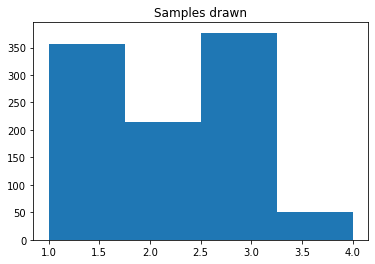

In [8]:
plt.hist(clusters,cluster_size[-1])
plt.title("Samples drawn")
plt.show()

# Observing the number of clusters for the regular dirichlet process

The expected number of tables open after n samples is given by:

$$ \sum_{k= 1}^{n} \frac{\theta}{\theta +k -1}$$

(see definition of the CRP distribution). This can be expressd using the digamma distribution.

In [9]:
alpha = 0
theta = 1.0
sample_size = 10000
cluster_mean = np.zeros(sample_size)
cluster_size_mean = np.zeros(1000)
n_iter= 100
for i in range(n_iter):
    samples, num_clusters, cluster_size = sample_PY(uniform, alpha, theta, sample_size = sample_size)
    cluster_mean += num_clusters/n_iter
    clusters, counts = np.unique(cluster_size, return_counts = True)
    for i, element in enumerate(counts):
        cluster_size_mean[i] += element/n_iter
        
cluster_size_mean = cluster_size_mean[cluster_size_mean >0]

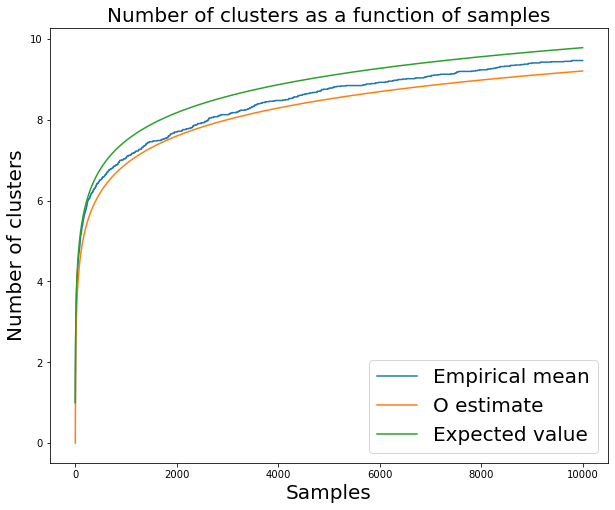

In [13]:
expected = expected_value_clusters(alpha, theta, sample_size)
big_0 = Big_O_estimate(alpha, theta, sample_size)
plt.figure(figsize = (10,8))
plt.plot(cluster_mean, label = "Empirical mean")
plt.plot(big_0, label = "O estimate")
plt.plot(expected,label = "Expected value")
plt.title("Number of clusters as a function of samples", size = 20)
plt.xlabel("Samples", size = 20)
plt.ylabel("Number of clusters", size = 20)
plt.legend(prop={'size': 20})
plt.show()

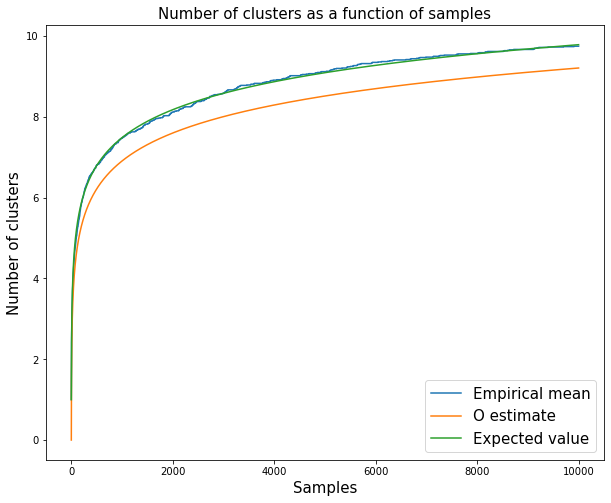

In [113]:
expected = expected_value_clusters(alpha, theta, sample_size)
big_0 = Big_O_estimate(alpha, theta, sample_size)
plt.figure(figsize = (10,8))
plt.plot(cluster_mean, label = "Empirical mean")
plt.plot(big_0, label = "O estimate")
plt.plot(expected,label = "Expected value")
plt.title("Number of clusters as a function of samples", size = 15)
plt.xlabel("Samples", size = 15)
plt.ylabel("Number of clusters", size = 15)
plt.legend(prop={'size': 15})
plt.show()

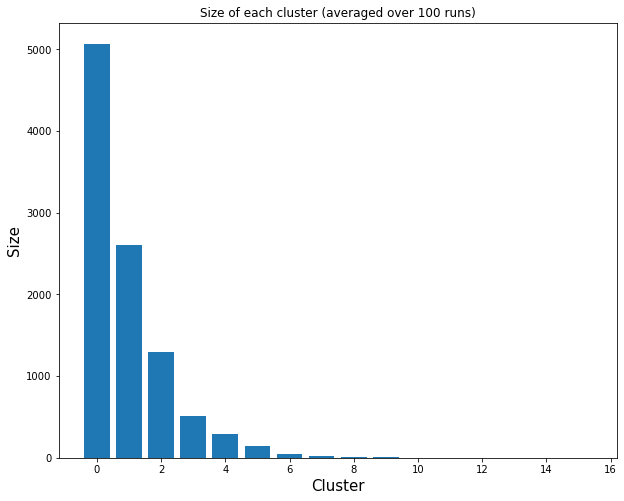

In [14]:
plt.figure(figsize = (10,8))
plt.title("Size of each cluster (averaged over 100 runs)")
plt.bar(np.arange(cluster_size_mean.shape[0]), cluster_size_mean)
plt.xlabel("Cluster", size = 15)
plt.ylabel("Size", size = 15)
plt.show()

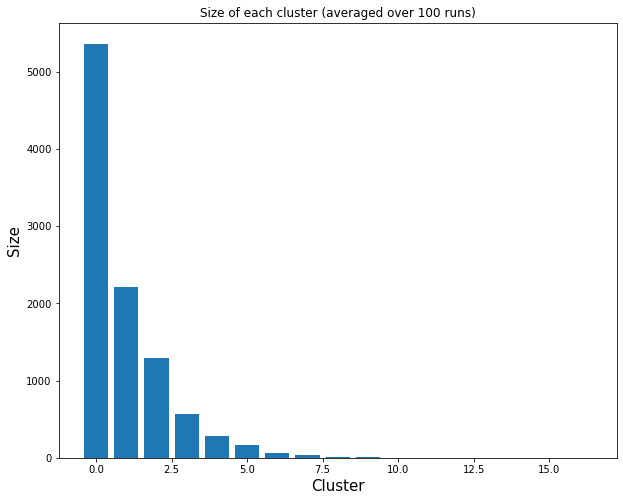

In [112]:
plt.figure(figsize = (10,8))
plt.title("Size of each cluster (averaged over 100 runs)")
plt.bar(np.arange(cluster_size_mean.shape[0]), cluster_size_mean)
plt.xlabel("Cluster", size = 15)
plt.ylabel("Size", size = 15)
plt.show()

# Pitman Yor Process

For the Pitman Yor process, the expected number of tables is given by 
$$ \frac{\Gamma(\theta + 1)}{\alpha \Gamma(\theta + \alpha)}n^\alpha$$

(see Pitman, Combinatorial Stochastic Processes, p.68).
## alpha = 0.5

In [114]:
alpha = 0.5
theta = 1.0
sample_size = 10000
cluster_mean = np.zeros(sample_size)
cluster_size_mean = np.zeros(sample_size)
n_iter= 100
for i in range(n_iter):
    samples, num_clusters, cluster_size = sample_PY(uniform, alpha, theta, sample_size = sample_size)
    cluster_mean += num_clusters/n_iter
    clusters, counts = np.unique(cluster_size, return_counts = True)
    for i, element in enumerate(counts):
        cluster_size_mean[i] += element/n_iter
        
cluster_size_mean = cluster_size_mean[cluster_size_mean >0]

In [ ]:
alpha = 0.5
theta = 1.0
sample_size = 10000
cluster_mean = np.zeros(sample_size)
cluster_size_mean = np.zeros(sample_size)
n_iter= 100
for i in range(n_iter):
    samples, num_clusters, cluster_size = sample_PY(uniform, alpha, theta, sample_size = sample_size)
    cluster_mean += num_clusters/n_iter
    clusters, counts = np.unique(cluster_size, return_counts = True)
    for i, element in enumerate(counts):
        cluster_size_mean[i] += element/n_iter
        
cluster_size_mean = cluster_size_mean[cluster_size_mean >0]

In [ ]:
expected = expected_value_clusters(alpha, theta, sample_size)
big_0 = Big_O_estimate(alpha, theta, sample_size)
plt.figure(figsize = (10,8))
plt.plot(cluster_mean, label = "Empirical mean")
plt.plot(big_0, label = "O estimate")
plt.plot(expected,label = "Expected value")
plt.title("Number of clusters as a function of samples", size = 15)
plt.xlabel("Samples", size = 15)
plt.ylabel("Number of clusters", size = 15)
plt.legend(prop={'size': 15})
plt.show()

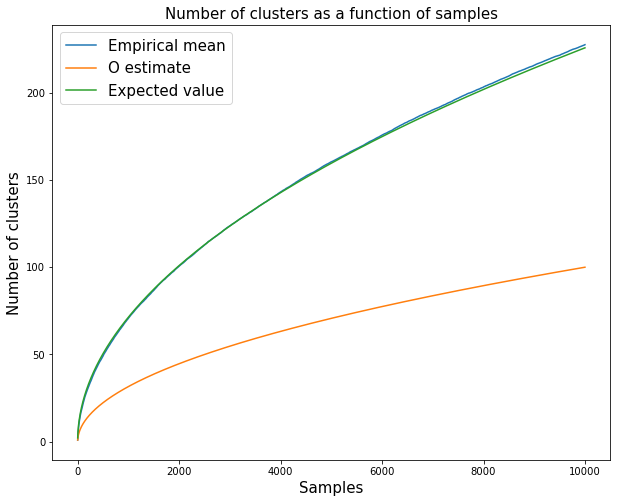

In [115]:
expected = expected_value_clusters(alpha, theta, sample_size)
big_0 = Big_O_estimate(alpha, theta, sample_size)
plt.figure(figsize = (10,8))
plt.plot(cluster_mean, label = "Empirical mean")
plt.plot(big_0, label = "O estimate")
plt.plot(expected,label = "Expected value")
plt.title("Number of clusters as a function of samples", size = 15)
plt.xlabel("Samples", size = 15)
plt.ylabel("Number of clusters", size = 15)
plt.legend(prop={'size': 15})
plt.show()

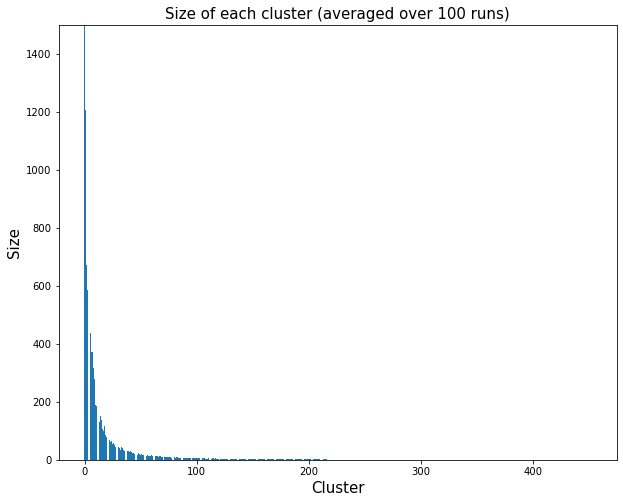

In [116]:
plt.figure(figsize = (10,8))
plt.title("Size of each cluster (averaged over 100 runs)", size = 15)
plt.bar(np.arange(cluster_size_mean.shape[0]), cluster_size_mean)
plt.xlabel("Cluster", size = 15)
plt.ylabel("Size", size = 15)
plt.ylim(top = 1500)
plt.show()

## alpha = 0.9

In [117]:
alpha = 0.9
theta = 1.0
sample_size = 10000
cluster_mean = np.zeros(sample_size)
cluster_size_mean = np.zeros(sample_size)
n_iter= 100
for i in range(n_iter):
    samples, num_clusters, cluster_size = sample_PY(uniform, alpha, theta, sample_size = sample_size)
    cluster_mean += num_clusters/n_iter
    clusters, counts = np.unique(cluster_size, return_counts = True)
    for i, element in enumerate(counts):
        cluster_size_mean[i] += element/n_iter
        
cluster_size_mean = cluster_size_mean[cluster_size_mean >0]

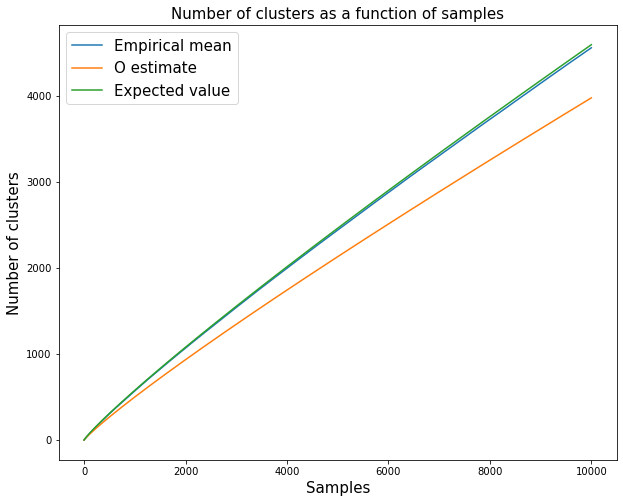

In [118]:
expected = expected_value_clusters(alpha, theta, sample_size)
big_0 = Big_O_estimate(alpha, theta, sample_size)
plt.figure(figsize = (10,8))
plt.plot(cluster_mean, label = "Empirical mean")
plt.plot(big_0, label = "O estimate")
plt.plot(expected,label = "Expected value")
plt.title("Number of clusters as a function of samples", size = 15)
plt.xlabel("Samples", size = 15)
plt.ylabel("Number of clusters", size = 15)
plt.legend(prop={'size': 15})
plt.show()

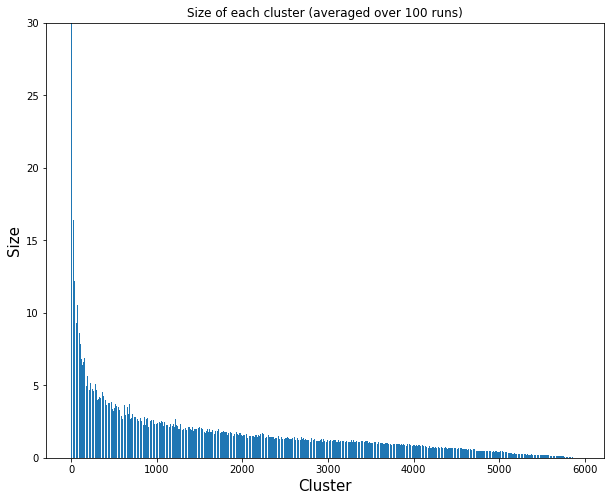

In [119]:
plt.figure(figsize = (10,8))
plt.title("Size of each cluster (averaged over 100 runs)")
plt.bar(np.arange(cluster_size_mean.shape[0]), cluster_size_mean)
plt.xlabel("Cluster", size = 15)
plt.ylabel("Size", size = 15)
plt.ylim(top = 30)
plt.show()

# Direct comparison between the two distributions